Precision: 0.6209150326797386
Recall: 0.5080213903743316
F1-score: 0.5588235294117647
Accuracy: 0.7867803837953091

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



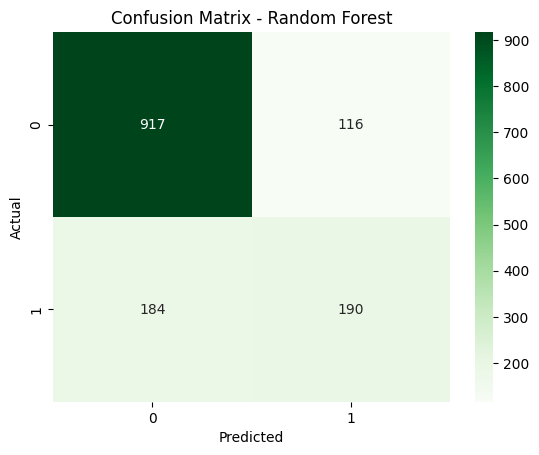


Summary: The F1-score is chosen as the final metric for churn prediction because it balances Precision and Recall.


In [2]:
# Assignment 7 – Model Evaluation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Customer-Churn-Cleaned.csv')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Split data
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Accuracy:', accuracy)

# Classification Report
print('\nDetailed Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\nSummary: The F1-score is chosen as the final metric for churn prediction because it balances Precision and Recall.')